<a href="https://colab.research.google.com/github/navbharti/DSJava/blob/master/MNIST_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import the dependencies
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:461: FutureWarning: Passing (type, 1) or 

In [11]:
# To determine which version you're using:
!pip show tensorflow

# For the current version: 
!pip install --upgrade tensorflow

# For a specific version:
!pip install tensorflow==1.2

Name: tensorflow
Version: 1.2.0
Summary: TensorFlow helps the tensors flow
Home-page: http://tensorflow.org/
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: six, werkzeug, bleach, protobuf, numpy, markdown, wheel, backports.weakref, html5lib
Required-by: fancyimpute
     |████████████████████████████████| 421.8MB 41kB/s 
     |████████████████████████████████| 450kB 68.7MB/s 
     |████████████████████████████████| 92kB 14.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=97847ba580d41f6b99e730f25279dde4c971abd892f484edd88ab6cdb2745b4c
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-

  Using cached https://files.pythonhosted.org/packages/5e/55/7995cc1e9e60fa37ea90e6777d832e75026fde5c6109215d892aaff2e9b7/tensorflow-1.2.0-cp36-cp36m-manylinux1_x86_64.whl
Processing /root/.cache/pip/wheels/b6/52/17/f0af18e3e0ec6fa60b361ffed15b4c3468f6f3bcdb87fbe079/Markdown-2.2.0-cp36-none-any.whl
ERROR: tensorboard 2.1.1 has requirement markdown>=2.6.8, but you'll have markdown 2.2.0 which is incompatible.
  Found existing installation: Markdown 3.2.1
    Uninstalling Markdown-3.2.1:
      Successfully uninstalled Markdown-3.2.1
  Found existing installation: tensorflow 2.1.0
    Uninstalling tensorflow-2.1.0:
      Successfully uninstalled tensorflow-2.1.0


In [12]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [2]:
%tensorflow_version 1.x
from tensorflow.examples.tutorials.mnist import input_data
mnist_data = input_data.read_data_sets("./data", one_hot = True)

TensorFlow is already loaded. Please restart the runtime to change versions.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [11]:
num_training = mnist_data.train.num_examples
num_testing = mnist_data.test.num_examples
num_validation = mnist_data.validation.num_examples
print("Mnist Datasize: Training Samples: {0}, Testing Samples: {1} and Validation Samples: {2}", num_training, num_testing, num_validation)

Mnist Datasize: Training Samples: {0}, Testing Samples: {1} and Validation Samples: {2} 55000 10000 5000


In [0]:
#network parameters of neural network
n_input = 784 #Input image of size 28 x 28
n_hidden_1 = 512 #First hidden
n_hidden_2 = 256 #Second hidden layer size
n_hidden_3 = 128
n_output = 10

In [0]:
learning_rate = 1e-4
epochs = 3000
batch_size = 128
keep_prob = tf.placeholder(tf.float32)

In [0]:
#Building tensorflow graph
X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_output])

In [0]:
#weight definition
nn_weight = {"W1": tf.Variable(tf.truncated_normal([n_input, n_hidden_1], stddev=0.1)),
             "W2": tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2], stddev=0.1)),
             "W3": tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3], stddev=0.1)),
             "Wout": tf.Variable(tf.truncated_normal([n_hidden_3, n_output], stddev=0.1))
             }

In [0]:
#Bias definition
nn_bias = {"B1": tf.Variable(tf.truncated_normal([n_hidden_1])),
             "B2": tf.Variable(tf.truncated_normal([n_hidden_2])),
             "B3": tf.Variable(tf.truncated_normal([n_hidden_3])),
             "B4": tf.Variable(tf.truncated_normal([n_output]))
             }

In [0]:
nn_layer_1 = tf.add(tf.matmul(X, nn_weight["W1"]), nn_bias["B1"])
nn_layer_2 = tf.add(tf.matmul(nn_layer_1, nn_weight["W2"]), nn_bias["B2"])
nn_layer_3 = tf.add(tf.matmul(nn_layer_2, nn_weight["W3"]), nn_bias["B3"])
layer_drop = tf.nn.dropout(nn_layer_3, keep_prob)
output_layer = tf.add(tf.matmul(layer_drop, nn_weight["Wout"]), nn_bias["B4"])

In [0]:
#Define the loss
computed_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output_layer, labels=Y))

In [0]:
#Define the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(computed_loss)

In [0]:
#Define prediction 
prediction_out = tf.equal(tf.argmax(output_layer, 1), tf.argmax(Y, 1))

In [0]:
#Define accuracy of the model
nn_accuracy = tf.reduce_mean(tf.cast(prediction_out, tf.float32))

In [0]:
#Initialize all the variables
init = tf.global_variables_initializer()

In [0]:
saver = tf.train.Saver()

In [29]:
#Execute the computation graph
with tf.Session() as sess:
  sess.run(init)
  for i in range(epochs):

    mini_batch_x, mini_batch_y = mnist_data.train.next_batch(batch_size)
    #print(mini_batch_x[0:1, :].shape)
    mini_batch_val_x, mini_batch_val_y = mnist_data.validation.next_batch(batch_size)

    sess.run(optimizer, feed_dict={X : mini_batch_x, Y : mini_batch_y, keep_prob:1})

    if i%100==0:
      mini_batch_loss, mini_batch_accuracy = sess.run([computed_loss, nn_accuracy], feed_dict = {X: mini_batch_x, Y: mini_batch_y, keep_prob:1})

      mini_batch_val_loss, mini_batch_val_accuracy = sess.run([computed_loss, nn_accuracy], feed_dict={X: mini_batch_x, Y: mini_batch_y, keep_prob:1})

      print("Iterations : {0}, Train_loss = {1}, Train_Accuracy {2}, val_loss {3}, val_accuracy {4}".format(i, mini_batch_loss, mini_batch_accuracy, mini_batch_val_loss, mini_batch_val_accuracy))
  print("Optimization Finished")
  test_accuracy = sess.run(nn_accuracy, feed_dict={X: mnist_data.test.images, Y: mnist_data.test.labels, keep_prob:1.0})
  print("Testing Accuracy is {0}".format(test_accuracy))

  saver_path = saver.save(sess, "./model/my_model.ckpt")

Iterations : 0, Train_loss = 3.9875292778015137, Train_Accuracy 0.0546875, val_loss 3.9875292778015137, val_accuracy 0.0546875
Iterations : 100, Train_loss = 2.7628233432769775, Train_Accuracy 0.1640625, val_loss 2.7628233432769775, val_accuracy 0.1640625
Iterations : 200, Train_loss = 2.4176392555236816, Train_Accuracy 0.28125, val_loss 2.4176392555236816, val_accuracy 0.28125
Iterations : 300, Train_loss = 2.37471866607666, Train_Accuracy 0.2578125, val_loss 2.37471866607666, val_accuracy 0.2578125
Iterations : 400, Train_loss = 2.020354747772217, Train_Accuracy 0.3828125, val_loss 2.020354747772217, val_accuracy 0.3828125
Iterations : 500, Train_loss = 1.8983097076416016, Train_Accuracy 0.3828125, val_loss 1.8983097076416016, val_accuracy 0.3828125
Iterations : 600, Train_loss = 1.6742472648620605, Train_Accuracy 0.453125, val_loss 1.6742472648620605, val_accuracy 0.453125
Iterations : 700, Train_loss = 1.6661745309829712, Train_Accuracy 0.453125, val_loss 1.6661745309829712, val_ac

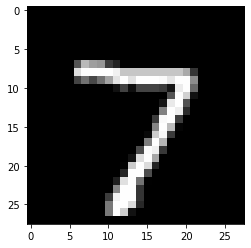

INFO:tensorflow:Restoring parameters from ./model/my_model.ckpt
Prediction for test image is [7]


In [36]:
#upload the test image from outside

img = cv2.imread("7.png")
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

rescaled_image = cv2.resize(gray_image, (28, 28))
plt.imshow(rescaled_image, cmap = "gray")
plt.show()
rescaled_image.shape

#test_image = rescaled_image.flatten()

dum = rescaled_image.reshape(1, -1)/255
dum.shape

with tf.Session() as sess:
  saver.restore(sess, "./model/my_model.ckpt")
  Z = output_layer.eval(feed_dict={X:dum, keep_prob:1.0})

  y_pred = np.argmax(Z, axis = 1)
  print("Prediction for test image is {0}".format(y_pred))